In [31]:
data = [
    'king is a strong man',
    'queen is a wise woman', 
    'boy is a young man',
    'girl is a young woman',
    'prince is a young king',
    'princess is a young queen',
    'man is strong', 
    'woman is pretty',
    'prince is a boy will be king',
    'princess is a girl will be queen'
]

In [2]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [33]:
stop_words = set(stopwords.words("english"))
sentences = [word_tokenize(sentence) for sentence in data]
for i,sentence in enumerate(sentences):
    sent = []
    for word in sentence:
        if word not in stop_words:
            sent.append(word)
    sentences[i] = sent

In [34]:
sentences

[['king', 'strong', 'man'],
 ['queen', 'wise', 'woman'],
 ['boy', 'young', 'man'],
 ['girl', 'young', 'woman'],
 ['prince', 'young', 'king'],
 ['princess', 'young', 'queen'],
 ['man', 'strong'],
 ['woman', 'pretty'],
 ['prince', 'boy', 'king'],
 ['princess', 'girl', 'queen']]

In [35]:
words = []
for sentence in sentences:
    for word in sentence:
        words.append(word)
words = set(words)
dictionary = {}
for i,word in enumerate(words):
    dictionary[word] = i
voca_size = len(dictionary)

In [36]:
dictionary

{'woman': 0,
 'prince': 1,
 'princess': 2,
 'young': 3,
 'pretty': 4,
 'strong': 5,
 'girl': 6,
 'man': 7,
 'king': 8,
 'wise': 9,
 'boy': 10,
 'queen': 11}

In [37]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [38]:
window_size = 2
data = []
for sentence in sentences:
    for i,word in enumerate(sentence):
        for target in sentence[max(i-window_size,0):min(i+window_size,len(sentence))+1]:
            if target != word:
                data.append([word,target])

In [39]:
data

[['king', 'strong'],
 ['king', 'man'],
 ['strong', 'king'],
 ['strong', 'man'],
 ['man', 'king'],
 ['man', 'strong'],
 ['queen', 'wise'],
 ['queen', 'woman'],
 ['wise', 'queen'],
 ['wise', 'woman'],
 ['woman', 'queen'],
 ['woman', 'wise'],
 ['boy', 'young'],
 ['boy', 'man'],
 ['young', 'boy'],
 ['young', 'man'],
 ['man', 'boy'],
 ['man', 'young'],
 ['girl', 'young'],
 ['girl', 'woman'],
 ['young', 'girl'],
 ['young', 'woman'],
 ['woman', 'girl'],
 ['woman', 'young'],
 ['prince', 'young'],
 ['prince', 'king'],
 ['young', 'prince'],
 ['young', 'king'],
 ['king', 'prince'],
 ['king', 'young'],
 ['princess', 'young'],
 ['princess', 'queen'],
 ['young', 'princess'],
 ['young', 'queen'],
 ['queen', 'princess'],
 ['queen', 'young'],
 ['man', 'strong'],
 ['strong', 'man'],
 ['woman', 'pretty'],
 ['pretty', 'woman'],
 ['prince', 'boy'],
 ['prince', 'king'],
 ['boy', 'prince'],
 ['boy', 'king'],
 ['king', 'prince'],
 ['king', 'boy'],
 ['princess', 'girl'],
 ['princess', 'queen'],
 ['girl', 'prin

In [40]:
def onehot(word):
    one_hot = np.zeros(voca_size)
    one_hot[dictionary[word]] = 1
    return one_hot

In [41]:
onehot("king")

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [42]:
X_train = []
y_train = []
for i in data:
    X_train.append(onehot(i[0]))
    y_train.append(onehot(i[1]))

In [26]:
embedding_size = 2

with tf.variable_scope("word2vec",reuse=tf.AUTO_REUSE):
    X = tf.placeholder(name="X", dtype=tf.float32, shape=[None,voca_size])
    y = tf.placeholder(name="y", dtype=tf.float32, shape=[None,voca_size])

    W1 = tf.get_variable("W1", shape=[voca_size, embedding_size], dtype=tf.float32, initializer=tf.random_normal_initializer())
    b1 = tf.get_variable("b1", shape=[embedding_size], dtype=tf.float32, initializer=tf.random_normal_initializer())

    layer1 = tf.matmul(X, W1) + b1

    W2 = tf.get_variable("W2", shape=[embedding_size, voca_size], dtype=tf.float32, initializer=tf.random_normal_initializer())
    b2 = tf.get_variable("b2", shape=[voca_size], dtype=tf.float32, initializer=tf.random_normal_initializer())

    output = tf.nn.softmax_cross_entropy_with_logits_v2(labels=y, logits=tf.matmul(layer1,W2) + b2)

    loss = tf.reduce_mean(output,axis=0)
    train = tf.train.AdamOptimizer(0.05).minimize(loss)
    
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for i in range(5000):
    l,_ = sess.run([loss,train],feed_dict={X:X_train, y:y_train})
    if i%1000 == 0:
        print("loss : ",l)

loss :  3.1284509
loss :  1.5437598
loss :  1.5333343
loss :  1.5311241
loss :  1.5291826


woman [  5.5880537 -13.17275  ]
prince [-5.256079  -1.5950387]
princess [ 2.2815313 -5.3877497]
young [0.55754465 0.9934356 ]
pretty [ 8.468933 10.093153]
strong [-1.4565146   0.46706748]
girl [  4.7928524 -10.225569 ]
man [-13.641595   -3.7097003]
king [-14.04949    -3.4013562]
wise [ 1.5003488 -1.4838688]
boy [-11.920719  -2.769219]
queen [  5.644661 -12.37257 ]


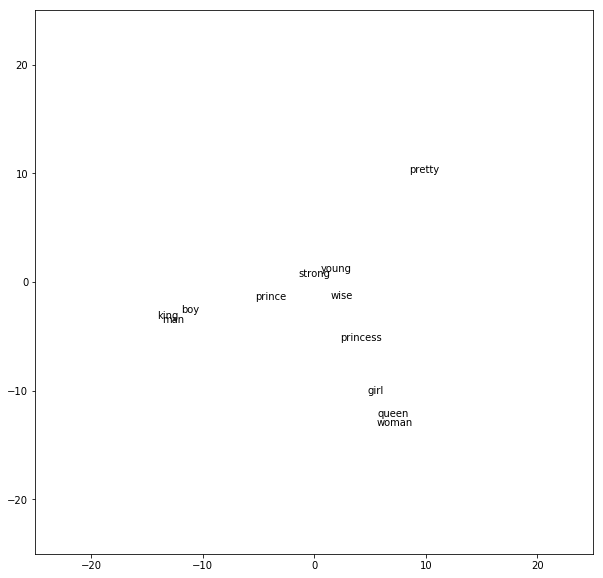

In [43]:
fig = plt.figure(figsize=(10,10))
for word in dictionary:
    res = sess.run(layer1,feed_dict={X:[onehot(word)]})[0]
    print(word,res)
    plt.annotate(word,res)
plt.xlim(-25,25)
plt.ylim(-25,25)
plt.show()